# New York City

***
## Pre-Process

In [1]:
# pip install folium

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
from geopy.geocoders import Nominatim
import requests

from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import folium
import time
from IPython.display import display_html

In [3]:
# load NYC data

with open('nyc_data.json') as json_data:
    nyc_data = json.load(json_data)

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [4]:
# singling out features

nyc_neighborhood_data = nyc_data['features']

[{'type': 'Feature',
  'id': 'nyu_2451_34572.1',
  'geometry': {'type': 'Point',
   'coordinates': [-73.84720052054902, 40.89470517661]},
  'geometry_name': 'geom',
  'properties': {'name': 'Wakefield',
   'stacked': 1,
   'annoline1': 'Wakefield',
   'annoline2': None,
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.84720052054902,
    40.89470517661,
    -73.84720052054902,
    40.89470517661]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.2',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82993910812398, 40.87429419303012]},
  'geometry_name': 'geom',
  'properties': {'name': 'Co-op City',
   'stacked': 2,
   'annoline1': 'Co-op',
   'annoline2': 'City',
   'annoline3': None,
   'annoangle': 0.0,
   'borough': 'Bronx',
   'bbox': [-73.82993910812398,
    40.87429419303012,
    -73.82993910812398,
    40.87429419303012]}},
 {'type': 'Feature',
  'id': 'nyu_2451_34572.3',
  'geometry': {'type': 'Point',
   'coordinates': [-73.82780644716412, 

In [5]:
# cram into dataframe

columns = ['Borough', 'Neighborhood','Latitude','Longitude']

nyc_neighborhood = pd.DataFrame(columns=columns)

for data in nyc_neighborhood_data:
    n_name = data['properties']['name']
    borough = data['properties']['borough']
    n_lat_lon = data['geometry']['coordinates']
    n_lat = n_lat_lon[1]
    n_lon = n_lat_lon[0]
    
    nyc_neighborhood = nyc_neighborhood.append({'Borough':borough,
                                               'Neighborhood':n_name,
                                               'Latitude':n_lat,
                                               'Longitude':n_lon}, ignore_index = True)

In [6]:
nyc_neighborhood.head(15)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [7]:
print('New York City has {} boroughs and {} neighborhoods'.format(
    len(nyc_neighborhood['Borough'].unique()),
    nyc_neighborhood.shape[0])
)

New York City has 5 boroughs and 306 neighborhoods


In [8]:
n_count = nyc_neighborhood['Neighborhood'].value_counts()
n_dup = n_count[n_count>1]

n_dup

Chelsea        2
Sunnyside      2
Murray Hill    2
Bay Terrace    2
Name: Neighborhood, dtype: int64

In [18]:
# for i in nyc_neighborhood:
#     if nyc_neighborhood['Neighborhood'].value_counts > 1:
#         nyc_neighborhood['Neighborhood'] = nyc_neighborhood['Neighborhood']+'('+nyc_neighborhood['Borough']+')'
#     else:
#         pass

# nyc_neighborhood        
        

In [19]:
# def addborough(str):
#     ny_dup = nyc_neighborhood['Neighborhood'].value_counts
#     if nyc_neighborhood['Neighborhood'] in n_dup.index:
#         nyc_neighborhood['Neighborhood'] = nyc_neighborhood['Neighborhood']+'('+nyc_neighborhood['Borough']+')'
#     else:
#         pass
    
# addborough(nyc_neighborhood['Neighborhood'])

# nyc_neighborhood
    

In [20]:
# For those duplicated neighborhood names,boroughs are added in paranthesis for clarification
for i in range(nyc_neighborhood.shape[0]):
    ny_1 = nyc_neighborhood.loc[i, 'Neighborhood']
    if nyc_neighborhood[nyc_neighborhood['Neighborhood'] == ny_1].shape[0] > 1:
        index = nyc_neighborhood[nyc_neighborhood['Neighborhood'] == ny_1].index.tolist()
        for j in index:
            ny_2 = nyc_neighborhood.loc[j, 'Borough']
            nyc_neighborhood.loc[j, 'Neighborhood'] = ny_1 + '(' + ny_2 + ')'

In [21]:
nyc_neighborhood.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [22]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent='ny_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('New York City Coordinates: {},{}'.format(latitude,longitude))

New York City Coordinates: 40.7127281,-74.0060152


## Mapping NYC

### Generate Neighborhood Map

In [23]:
# nyc map

map_nyc = folium.Map(location=[latitude,longitude], zoom_start= 10)

# add notations/markers
for lat, lng, borough, neighborhood in zip(nyc_neighborhood['Latitude'],
                                           nyc_neighborhood['Longitude'],
                                           nyc_neighborhood['Borough'],
                                           nyc_neighborhood['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color = 'blue',
        fill = True,
        fill_color = '#B7D7D7',
        fill_opacity = 0.7,
        parse_html=False).add_to(map_nyc)
    
map_nyc

***
### Get Neighborhood Venues using Foursquare API

In [24]:
CLIENT_ID = 'EOVF3FQNMGGHODTTENDHEN2B1UUFOBE5GCUVC0TT42JNP5Z2' # your Foursquare ID
CLIENT_SECRET = 'GNHIRJ00BOI43KA0YNCR0QDG0HP4JC3U3CQB2FX4RI1TGLRZ' # your Foursquare Secret
VERSION = '20200305' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EOVF3FQNMGGHODTTENDHEN2B1UUFOBE5GCUVC0TT42JNP5Z2
CLIENT_SECRET:GNHIRJ00BOI43KA0YNCR0QDG0HP4JC3U3CQB2FX4RI1TGLRZ


In [25]:
def getNearbyFoodVenues(names, latitudes, longitudes, radius = 500, limit = 100):
    
    venues_list = []
    
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create API request
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            '4d4b7105d754a06374d81259',
            limit)
        
        # GET request
        results = requests.get(url).json()['response']['groups'][0]['items']

        
        # return only relevant result
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list ])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude',    
                             'Neighborhood Longitude',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category'
                             ]
    return(nearby_venues)



In [28]:
nyc_venues = getNearbyFoodVenues(names=nyc_neighborhood['Neighborhood'],
                             latitudes=nyc_neighborhood['Latitude'],
                             longitudes=nyc_neighborhood['Longitude']
                            )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [29]:
print(nyc_venues.shape)
nyc_venues.head()

(8321, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop
1,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898083,-73.850259,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,SUBWAY,40.890468,-73.849152,Sandwich Place
3,Wakefield,40.894705,-73.847201,Pitman Deli,40.894149,-73.845748,Food
4,Wakefield,40.894705,-73.847201,Central Deli,40.896728,-73.844387,Deli / Bodega


In [30]:
# nyc_venues['Venue Category'].unique().tolist()

In [31]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues['Venue Category'], prefix='',prefix_sep='')

# add Neighborhood column
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood']

# change to first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot= nyc_onehot[fixed_columns]

nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Czech Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Hunan Restaurant,Indian Restaurant,Indian Sweet Shop,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Peking Duck Restaurant,Persian Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Polish Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Snack Place,Soba Restaurant,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Tonkatsu Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wings Joint
0,Allerton,0.0,0.0,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.130435,0.0,0.0,0.0,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.086957,0.0,0.0,0.0,0.0,0.0,0.173913,0.0,0.000000,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.043478,0.0,0.0,0.000000,0.0,0.043478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043478,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260870,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043478,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.133333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.0,0.0,0.066667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.066667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arden Heights,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.000000

***
### Analyze Neighborhood Venues

In [32]:
# Top 10 venues function

def return_most_common_venues(row,num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending = False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10
indicators = ['st','nd','rd']

In [33]:
columns = ['Neighborhood']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Category'.format(ind+1))
        
nyc_venues_sorted = pd.DataFrame(columns = columns)
nyc_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

for ind in np.arange(nyc_grouped.shape[0]):
    nyc_venues_sorted.iloc[ind,1:]=return_most_common_venues(nyc_grouped.iloc[ind,:],num_top_venues)

nyc_venues_sorted.head()

,Neighborhood,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,Allerton,Pizza Place,Deli / Bodega,Bakery,Chinese Restaurant,Food,Fried Chicken Joint,Mexican Restaurant,Breakfast Spot,Fast Food Restaurant,Donut Shop
1,Annadale,Pizza Place,American Restaurant,Bakery,Restaurant,Sushi Restaurant,Food,Deli / Bodega,Diner,Dumpling Restaurant,Eastern European Restaurant
2,Arden Heights,Pizza Place,Deli / Bodega,English Restaurant,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Wings Joint
3,Arlington,Deli / Bodega,American Restaurant,Food,Fast Food Restaurant,Wings Joint,Ethiopian Restaurant,Food Court,Fish & Chips Shop,Filipino Restaurant,Falafel Restaurant
4,Arrochar,Italian Restaurant,Bagel Shop,Pizza Place,Deli / Bodega,Middle Eastern Restaurant,Taco Place,Sandwich Place,Food Truck,Mediterranean Restaurant,Polish Restaurant


***
### NYC Cluster Map and Analysis

In [34]:
kclusters = 5

nyc_grouped_clustering = nyc_grouped.drop('Neighborhood',1)

kmeans = KMeans(n_clusters=kclusters, random_state= 0).fit(nyc_grouped_clustering)

kmeans.labels_[0:10]

array([0, 0, 3, 4, 1, 4, 4, 0, 1, 0], dtype=int32)

In [35]:
nyc_venues_sorted.insert(0,'Cluster Labels',kmeans.labels_)

nyc_merged = nyc_neighborhood

nyc_merged = nyc_merged.join(nyc_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

nyc_merged['Cluster Labels'] = nyc_merged['Cluster Labels'].fillna(0)
nyc_merged['Cluster Labels'] = nyc_merged['Cluster Labels'].astype(int)
nyc_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,Bronx,Wakefield,40.894705,-73.847201,0,Deli / Bodega,Food,Sandwich Place,Pizza Place,Caribbean Restaurant,Donut Shop,Hot Dog Joint,Filipino Restaurant,Indian Sweet Shop,Dosa Place
1,Bronx,Co-op City,40.874294,-73.829939,0,Restaurant,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Bagel Shop,Chinese Restaurant,Deli / Bodega,Egyptian Restaurant,Eastern European Restaurant,Empanada Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,0,Caribbean Restaurant,Deli / Bodega,Diner,Chinese Restaurant,Fast Food Restaurant,Donut Shop,Seafood Restaurant,Pizza Place,Bakery,Indian Restaurant
3,Bronx,Fieldston,40.895437,-73.905643,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bronx,Riverdale,40.890834,-73.912585,4,Food Truck,Ethiopian Restaurant,Food Court,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,English Restaurant,Israeli Restaurant


In [36]:
# create cluster map

nyc_map_cluster = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'],nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi)+'Cluster'+str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#333333',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(nyc_map_cluster)
    
nyc_map_cluster

In [182]:
# Cluster 0 --- Quick Service (Asian, Pizza, Deli and Fast Food)
nyc_cluster_0=nyc_merged.loc[nyc_merged['Cluster Labels']==0,
               nyc_merged.columns[:]]

# nyc_cluster_0

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
0,Bronx,Wakefield,40.894705,-73.847201,0,Deli / Bodega,Food,Sandwich Place,Pizza Place,Caribbean Restaurant,Donut Shop,Hot Dog Joint,Filipino Restaurant,Indian Sweet Shop,Dosa Place
1,Bronx,Co-op City,40.874294,-73.829939,0,Restaurant,Pizza Place,Fast Food Restaurant,Fried Chicken Joint,Bagel Shop,Chinese Restaurant,Deli / Bodega,Egyptian Restaurant,Eastern European Restaurant,Empanada Restaurant
2,Bronx,Eastchester,40.887556,-73.827806,0,Caribbean Restaurant,Deli / Bodega,Diner,Chinese Restaurant,Fast Food Restaurant,Donut Shop,Seafood Restaurant,Pizza Place,Bakery,Indian Restaurant
3,Bronx,Fieldston,40.895437,-73.905643,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Bronx,Kingsbridge,40.881687,-73.902818,0,Pizza Place,Deli / Bodega,Sandwich Place,Bakery,Chinese Restaurant,Donut Shop,Latin American Restaurant,Mexican Restaurant,Diner,Fried Chicken Joint
8,Bronx,Norwood,40.877224,-73.879391,0,Deli / Bodega,Pizza Place,Chinese Restaurant,American Restaurant,Fried Chicken Joint,Restaurant,Sandwich Place,Fast Food Restaurant,Caribbean Restaurant,Spanish Restaurant
11,Bronx,Pelham Parkway,40.857413,-73.854756,0,Italian Restaurant,Chinese Restaurant,Deli / Bodega,Pizza Place,Donut Shop,Sushi Restaurant,Mexican Restaurant,Bakery,Café,Thai Restaurant
13,Bronx,Bedford Park,40.870185,-73.885512,0,Deli / Bodega,Chinese Restaurant,Mexican Restaurant,Pizza Place,Diner,Fried Chicken Joint,Sandwich Place,Food Truck,Spanish Restaurant,Bakery
14,Bronx,University Heights,40.855727,-73.910416,0,Pizza Place,Chinese Restaurant,Deli / Bodega,Latin American Restaurant,Fried Chicken Joint,Food,Bakery,Burger Joint,Fast Food Restaurant,Donut Shop
15,Bronx,Morris Heights,40.847898,-73.919672,0,Deli / Bodega,Spanish Restaurant,Latin American Restaurant,Pizza Place,Chinese Restaurant,Ethiopian Restaurant,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant


In [184]:
# Cluster 1 --- Italian Cuisine
nyc_cluster_1 = nyc_merged.loc[nyc_merged['Cluster Labels']==1,
               nyc_merged.columns[:]]
# nyc_cluster_1.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
29,Bronx,Country Club,40.844246,-73.824099,1,Sandwich Place,Italian Restaurant,Chinese Restaurant,Deli / Bodega,Vegetarian / Vegan Restaurant,Indian Restaurant,Hunan Restaurant,Donut Shop,Indian Sweet Shop,Dosa Place
34,Bronx,Belmont,40.857277,-73.888452,1,Italian Restaurant,Deli / Bodega,Pizza Place,Bakery,Mexican Restaurant,Sandwich Place,Restaurant,Café,Diner,Donut Shop
39,Bronx,Edgewater Park,40.821986,-73.813885,1,Italian Restaurant,Deli / Bodega,Pizza Place,Donut Shop,Japanese Restaurant,Chinese Restaurant,Fast Food Restaurant,American Restaurant,Asian Restaurant,Eastern European Restaurant
66,Brooklyn,Carroll Gardens,40.680540,-73.994654,1,Italian Restaurant,Deli / Bodega,Pizza Place,Bakery,Food Truck,Thai Restaurant,Breakfast Spot,Café,Diner,Restaurant
107,Manhattan,Upper East Side,40.775639,-73.960508,1,Italian Restaurant,American Restaurant,Pizza Place,Diner,French Restaurant,Bakery,Sushi Restaurant,Chinese Restaurant,Mexican Restaurant,Café


In [186]:
# Cluster 2 --- Caribbean Restaurant
nyc_cluster_2 = nyc_merged.loc[nyc_merged['Cluster Labels']==2,
               nyc_merged.columns[:]]
# nyc_cluster_2.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
9,Bronx,Williamsbridge,40.881039,-73.857446,2,Caribbean Restaurant,Soup Place,Wings Joint,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Ethiopian Restaurant,Food Stand
168,Queens,Cambria Heights,40.692775,-73.735269,2,Caribbean Restaurant,Restaurant,Bakery,Chinese Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Food Stand
188,Queens,Laurelton,40.667884,-73.740256,2,Caribbean Restaurant,Wings Joint,Falafel Restaurant,Food Court,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Ethiopian Restaurant,Diner


In [187]:
# Cluster 3 --- Deli/Bodega and Ethinic Special Cuisine
nyc_cluster_3= nyc_merged.loc[nyc_merged['Cluster Labels']==3,
               nyc_merged.columns[:]]

# nyc_cluster_3.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
7,Bronx,Woodlawn,40.898273,-73.867315,3,Deli / Bodega,Pizza Place,Italian Restaurant,Donut Shop,Bakery,Food Truck,Indian Restaurant,American Restaurant,Eastern European Restaurant,Egyptian Restaurant
63,Brooklyn,Bedford Stuyvesant,40.687232,-73.941785,3,Deli / Bodega,Pizza Place,Café,BBQ Joint,Restaurant,Fish & Chips Shop,Fried Chicken Joint,New American Restaurant,Bagel Shop,Japanese Restaurant
72,Brooklyn,East New York,40.669926,-73.880699,3,Deli / Bodega,Spanish Restaurant,Chinese Restaurant,Fast Food Restaurant,Fried Chicken Joint,Caribbean Restaurant,Food Truck,Asian Restaurant,Pizza Place,Latin American Restaurant
89,Brooklyn,Ocean Hill,40.678403,-73.913068,3,Deli / Bodega,Food,Fried Chicken Joint,Southern / Soul Food Restaurant,Chinese Restaurant,Pizza Place,Seafood Restaurant,Bakery,Salad Place,Mexican Restaurant
144,Queens,Glendale,40.702762,-73.870742,3,Deli / Bodega,Pizza Place,Chinese Restaurant,Ethiopian Restaurant,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,Wings Joint


In [188]:
# Cluster 4 --- Street Food, cafe and Donuts
nyc_cluster_4 = nyc_merged.loc[nyc_merged['Cluster Labels']==4,
               nyc_merged.columns[:]]
# nyc_cluster_4.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Category,2nd Most Common Category,3rd Most Common Category,4th Most Common Category,5th Most Common Category,6th Most Common Category,7th Most Common Category,8th Most Common Category,9th Most Common Category,10th Most Common Category
4,Bronx,Riverdale,40.890834,-73.912585,4,Food Truck,Ethiopian Restaurant,Food Court,Food,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Falafel Restaurant,English Restaurant,Israeli Restaurant
6,Manhattan,Marble Hill,40.876551,-73.910660,4,Sandwich Place,Deli / Bodega,Steakhouse,Bakery,Pizza Place,Seafood Restaurant,Fast Food Restaurant,Diner,Donut Shop,American Restaurant
10,Bronx,Baychester,40.866858,-73.835798,4,Donut Shop,Pizza Place,Mexican Restaurant,Fried Chicken Joint,Fast Food Restaurant,Spanish Restaurant,Sandwich Place,American Restaurant,Eastern European Restaurant,Dumpling Restaurant
12,Bronx,City Island,40.847247,-73.786488,4,Deli / Bodega,Seafood Restaurant,Tapas Restaurant,Pizza Place,Sandwich Place,Café,Spanish Restaurant,Diner,French Restaurant,Italian Restaurant
18,Bronx,West Farms,40.839475,-73.877745,4,Donut Shop,Sandwich Place,Pizza Place,Fast Food Restaurant,Chinese Restaurant,Latin American Restaurant,Diner,Egyptian Restaurant,Eastern European Restaurant,Empanada Restaurant


***
# Toronto

## Pre-Process

In [38]:
import urllib.request
from urllib.request import urlopen

from bs4 import BeautifulSoup

In [39]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

html = urlopen(url)

soup = BeautifulSoup(html,'html.parser')

In [40]:
tor_neighborhood = pd.read_html(url)
tor_neighborhood = tor_neighborhood[0]
tor_neighborhood.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [41]:
print('Canada has {} boroughs and {} neighborhoods.'.format(
    len(tor_neighborhood['Borough'].unique()),
    tor_neighborhood.shape[0]))

Canada has 11 boroughs and 287 neighborhoods.


In [42]:
tor_neighborhood = tor_neighborhood[tor_neighborhood['Borough'] != 'Not assigned']

In [43]:
print('Canada has {} boroughs and {} neighborhoods after removing irrelevant data.'.format(
    len(tor_neighborhood['Borough'].unique()),
    tor_neighborhood.shape[0]))

Canada has 10 boroughs and 210 neighborhoods after removing irrelevant data.


In [44]:
tor_neighborhood = pd.DataFrame(tor_neighborhood.groupby(['Postcode'],as_index = False).agg(
                    lambda x: ', '.join(set(x))))

In [45]:
tor_neighborhood.rename(columns={'Postcode':'Postal Code','Neighbourhood':'Neighborhood'}, inplace=True)
tor_neighborhood.head()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Port Union, Rouge Hill, Highland Creek"
2,M1E,Scarborough,"Guildwood, West Hill, Morningside"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [46]:
tor_lat_lng_df = pd.read_csv('canada_data.csv')
tor_lat_lng_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [47]:
tor_neighborhood['Postal Code'].isin(tor_lat_lng_df['Postal Code']).all()

True

In [48]:
tor_neighborhood = tor_neighborhood.merge(tor_lat_lng_df, on='Postal Code', how='inner')

In [49]:
tor_neighborhood.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Port Union, Rouge Hill, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, West Hill, Morningside",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


## Toronto Neighborhood Maps

In [50]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent = 'toronto_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Toronto, Canada geographical coordinates are {}, {}.'.format(latitude,longitude))

Toronto, Canada geographical coordinates are 43.653963, -79.387207.


In [102]:
# Create Toronto Map

map_toronto = folium.Map(location=[latitude,longitude], zoom_start= 10)

# Add notations

for lat, lng, borough, neighborhood in zip(tor_neighborhood['Latitude'],
                                           tor_neighborhood['Longitude'],
                                           tor_neighborhood['Borough'],
                                           tor_neighborhood['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color = 'blue',
        fill = True,
        fill_color = '#B7D7D7',
        fill_opacity = 0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

In [52]:
toronto_venues = getNearbyFoodVenues(names = tor_neighborhood['Neighborhood'], 
                                     latitudes = tor_neighborhood['Latitude'],
                                     longitudes = tor_neighborhood['Longitude'])

Rouge, Malvern
Port Union, Rouge Hill, Highland Creek
Guildwood, West Hill, Morningside
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Oakridge, Golden Mile, Clairlea
Cliffside, Cliffcrest, Scarborough Village West
Cliffside West, Birch Cliff
Scarborough Town Centre, Wexford Heights, Dorset Park
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
L'Amoreaux East, Steeles East, Milliken, Agincourt North
L'Amoreaux West
Upper Rouge
Hillcrest Village
Henry Farm, Fairview, Oriole
Bayview Village
Silver Hills, York Mills
Willowdale, Newtonbrook
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Don Mills South, Flemingdon Park
Wilson Heights, Bathurst Manor, Downsview North
Northwood Park, York University
Downsview East, CFB Toronto
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [53]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,Meena's Fine Foods,43.804476,-79.199753,Indian Restaurant
2,"Guildwood, West Hill, Morningside",43.763573,-79.188711,Doug's Bakery,43.762400,-79.192285,Bakery
3,"Guildwood, West Hill, Morningside",43.763573,-79.188711,Sail Sushi,43.765951,-79.191275,Restaurant
4,"Guildwood, West Hill, Morningside",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant


In [54]:
print('There are {} unique categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 94 unique categories.


## Analyze Neighborhood

In [103]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues['Venue Category'], prefix='',prefix_sep='')

# add Neighborhood column
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood']

# change to first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot= toronto_onehot[fixed_columns]

# toronto_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Belgian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Hakka Restaurant,Halal Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,Peking Duck Restaurant,Persian Restaurant,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Poutine Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Guildwood, West Hill, Morningside",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, West Hill, Morningside",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, West Hill, Morningside",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
# toronto_grouped.head()

NameError: name 'toronto_onehot' is not defined

In [57]:
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# cram into a new dataframe
tor_venues_sorted = pd.DataFrame(columns = columns)
tor_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    tor_venues_sorted.iloc[ind,1:]=return_most_common_venues(toronto_grouped.iloc[ind,:],num_top_venues)

tor_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Breakfast Spot,Chinese Restaurant,Latin American Restaurant,Wings Joint,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
1,"Bathurst Quay, Island airport, CN Tower, King ...",American Restaurant,Tapas Restaurant,Wings Joint,Fast Food Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
2,Bayview Village,Chinese Restaurant,Café,Japanese Restaurant,Wings Joint,Falafel Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
3,"Bedford Park, Lawrence Manor East",Pizza Place,Italian Restaurant,Restaurant,Sandwich Place,Thai Restaurant,Sushi Restaurant,Japanese Restaurant,Café,Indian Restaurant,Breakfast Spot
4,Berczy Park,Sandwich Place,Bakery,Italian Restaurant,Restaurant,Moroccan Restaurant,Café,Greek Restaurant,Bistro,Seafood Restaurant,Diner


## Toronto Cluster

In [58]:
kclusters = 5

tor_grouped_clustering = toronto_grouped.drop('Neighborhood',1)

kmeans = KMeans(n_clusters=kclusters, random_state= 0).fit(tor_grouped_clustering)

kmeans.labels_[0:1000]

array([0, 4, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 4, 2, 2, 1, 2, 2,
       0, 3, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 1, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2], dtype=int32)

In [60]:
tor_venues_sorted.insert(0,'Cluster Labels',kmeans.labels_)

toronto_merged = tor_neighborhood

toronto_merged = toronto_merged.join(tor_venues_sorted.set_index('Neighborhood'), on = 'Neighborhood')

toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].fillna(0)
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,0,Fast Food Restaurant,Indian Restaurant,Wings Joint,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant
1,M1C,Scarborough,"Port Union, Rouge Hill, Highland Creek",43.784535,-79.160497,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M1E,Scarborough,"Guildwood, West Hill, Morningside",43.763573,-79.188711,2,Pizza Place,Breakfast Spot,Restaurant,Bakery,Mexican Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,0,Indian Restaurant,Korean Restaurant,Mexican Restaurant,Wings Joint,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Dumpling Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,Hakka Restaurant,Thai Restaurant,Fried Chicken Joint,Caribbean Restaurant,Bakery,Falafel Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop


## Cluster Map

In [61]:
# map out

tor_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'],toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi)+'Cluster'+str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='#333333',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(tor_map_clusters)
    
tor_map_clusters

In [195]:
# Cluster 0 
tor_cluster_0 = toronto_merged.loc[toronto_merged['Cluster Labels']==0,
               toronto_merged.columns[:]]
# tor_cluster_0.head()

# Cluster 1 
tor_cluster_1 = toronto_merged.loc[toronto_merged['Cluster Labels']==1,
               toronto_merged.columns[:]]
# tor_cluster_1.head()

# Cluster 2 
tor_cluster_2 = toronto_merged.loc[toronto_merged['Cluster Labels']==2,
               toronto_merged.columns[:]]
# tor_cluster_2.head()

# Cluster 1 
tor_cluster_3 = toronto_merged.loc[toronto_merged['Cluster Labels']==3,
               toronto_merged.columns[:]]
# tor_cluster_3.head()

# Cluster 1 
tor_cluster_4 = toronto_merged.loc[toronto_merged['Cluster Labels']==4,
               toronto_merged.columns[:]]
# tor_cluster_4.head()

## EDA and Comparative Analysis

***
## Most Common Venues

In [131]:
kind = 'barh'
alpha = 0.9
n_color = '#8FB0A9'
t_color = '#D76735'

### NYC Top 10 Venues

In [2]:
# NYC
nyc_top10 = nyc_venues['Venue Category'].value_counts()
nyc_plot = nyc_top10.head(10).plot(kind= kind, color = n_color, alpha =alpha).invert_yaxis()
# nyc_plot.set_title('NYC Top 10 Venues')

NameError: name 'nyc_venues' is not defined

### Toronto Top 10 Venues

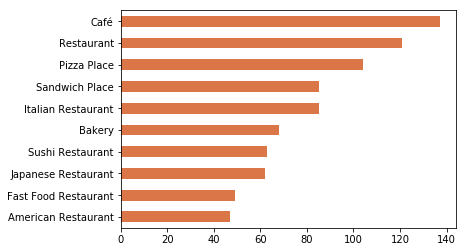

In [139]:
# Toronto
tor_top10 = toronto_venues['Venue Category'].value_counts()
tor_plot = tor_top10.head(10).plot(kind= kind, color = t_color, alpha =alpha).invert_yaxis()

## Cluster Breakdown - NYC

In [204]:
for col in [list(nyc_merged.columns.values)[i] for i in [5,6,0]]:
    print(nyc_cluster_0[col].value_counts(ascending = False))
    print('\n')

Deli / Bodega           36
Pizza Place             35
Chinese Restaurant      20
Bakery                   4
Donut Shop               4
Italian Restaurant       3
Restaurant               2
Spanish Restaurant       2
Caribbean Restaurant     2
Mexican Restaurant       2
Fast Food Restaurant     1
Bagel Shop               1
Sushi Restaurant         1
Fried Chicken Joint      1
American Restaurant      1
Korean Restaurant        1
Diner                    1
Name: 1st Most Common Category, dtype: int64


Pizza Place                  29
Deli / Bodega                28
Chinese Restaurant           19
Italian Restaurant            7
Donut Shop                    4
American Restaurant           4
Latin American Restaurant     4
Bagel Shop                    3
Food                          3
Fried Chicken Joint           3
Caribbean Restaurant          2
Mexican Restaurant            2
Asian Restaurant              2
Spanish Restaurant            1
Japanese Restaurant           1
Fast Food Rest

In [205]:
for col in [list(nyc_merged.columns.values)[i] for i in [5,6,0]]:
    print(nyc_cluster_1[col].value_counts(ascending = False))
    print('\n')

Italian Restaurant    22
Deli / Bodega          2
Sandwich Place         1
Bagel Shop             1
Name: 1st Most Common Category, dtype: int64


Deli / Bodega           7
Bagel Shop              4
Café                    3
Sandwich Place          2
American Restaurant     2
Italian Restaurant      2
Greek Restaurant        1
Food                    1
Donut Shop              1
Pizza Place             1
Asian Restaurant        1
Ethiopian Restaurant    1
Name: 2nd Most Common Category, dtype: int64


Staten Island    15
Manhattan         3
Bronx             3
Queens            3
Brooklyn          2
Name: Borough, dtype: int64




In [206]:
for col in [list(nyc_merged.columns.values)[i] for i in [5,6,0]]:
    print(nyc_cluster_2[col].value_counts(ascending = False))
    print('\n')

Caribbean Restaurant    3
Name: 1st Most Common Category, dtype: int64


Soup Place     1
Wings Joint    1
Restaurant     1
Name: 2nd Most Common Category, dtype: int64


Queens    2
Bronx     1
Name: Borough, dtype: int64




In [207]:
for col in [list(nyc_merged.columns.values)[i] for i in [5,6,0]]:
    print(nyc_cluster_3[col].value_counts(ascending = False))
    print('\n')

Deli / Bodega    18
Pizza Place       1
Irish Pub         1
Name: 1st Most Common Category, dtype: int64


Ethiopian Restaurant    3
Food                    3
Pizza Place             3
Fast Food Restaurant    3
Sandwich Place          1
Afghan Restaurant       1
Deli / Bodega           1
Spanish Restaurant      1
Donut Shop              1
Chinese Restaurant      1
American Restaurant     1
Italian Restaurant      1
Name: 2nd Most Common Category, dtype: int64


Queens           9
Staten Island    7
Brooklyn         3
Bronx            1
Name: Borough, dtype: int64




In [208]:
for col in [list(nyc_merged.columns.values)[i] for i in [5,6,0]]:
    print(nyc_cluster_4[col].value_counts(ascending = False))  
    print('\n')
    

Deli / Bodega                      25
Italian Restaurant                 20
Pizza Place                        12
Donut Shop                          6
Food Truck                          6
Food                                5
Sandwich Place                      5
Chinese Restaurant                  5
American Restaurant                 4
Latin American Restaurant           4
Caribbean Restaurant                4
Café                                4
Mexican Restaurant                  3
Korean Restaurant                   3
Fast Food Restaurant                2
Thai Restaurant                     2
Indian Restaurant                   2
Sushi Restaurant                    2
Bakery                              2
Moroccan Restaurant                 1
Seafood Restaurant                  1
Fried Chicken Joint                 1
Restaurant                          1
Turkish Restaurant                  1
Spanish Restaurant                  1
Southern / Soul Food Restaurant     1
Burger Joint

## Cluster Breakdown - Toronto

In [212]:
for col in [list(toronto_merged.columns.values)[i] for i in [6,7,1]]:
    print(tor_cluster_0[col].value_counts(ascending = False))
    print('\n')

Fast Food Restaurant         5
Indian Restaurant            3
Bakery                       2
Wings Joint                  2
Deli / Bodega                2
Middle Eastern Restaurant    1
Food Truck                   1
Cafeteria                    1
Chinese Restaurant           1
Filipino Restaurant          1
Hakka Restaurant             1
Vietnamese Restaurant        1
American Restaurant          1
Breakfast Spot               1
Name: 1st Most Common Venue, dtype: int64


Fast Food Restaurant        4
Wings Joint                 3
Vietnamese Restaurant       2
Fried Chicken Joint         2
Bakery                      2
Indian Restaurant           2
BBQ Joint                   1
Pizza Place                 1
Chinese Restaurant          1
Hot Dog Joint               1
Mediterranean Restaurant    1
Korean Restaurant           1
Thai Restaurant             1
Breakfast Spot              1
Name: 2nd Most Common Venue, dtype: int64


North York         11
Scarborough        10
Etobicoke     

In [213]:
for col in [list(toronto_merged.columns.values)[i] for i in [6,7,1]]:
    print(tor_cluster_1[col].value_counts(ascending = False))
    print('\n')

Pizza Place           18
Greek Restaurant       1
Falafel Restaurant     1
Name: 1st Most Common Venue, dtype: int64


Bakery                  2
Sandwich Place          2
Pizza Place             2
Asian Restaurant        2
Fried Chicken Joint     2
Wings Joint             2
Breakfast Spot          2
Gastropub               1
Café                    1
Chinese Restaurant      1
Deli / Bodega           1
Caribbean Restaurant    1
Thai Restaurant         1
Name: 2nd Most Common Venue, dtype: int64


Etobicoke          6
North York         5
Scarborough        3
East York          2
West Toronto       1
York               1
Central Toronto    1
East Toronto       1
Name: Borough, dtype: int64




In [214]:
for col in [list(toronto_merged.columns.values)[i] for i in [6,7,1]]:
    print(tor_cluster_2[col].value_counts(ascending = False))
    print('\n')

Café                    11
Pizza Place              8
Restaurant               6
Sandwich Place           3
Sushi Restaurant         3
Asian Restaurant         2
Chinese Restaurant       2
Fast Food Restaurant     1
Breakfast Spot           1
Seafood Restaurant       1
Diner                    1
Ramen Restaurant         1
Hot Dog Joint            1
Greek Restaurant         1
Japanese Restaurant      1
Dim Sum Restaurant       1
Bakery                   1
Caribbean Restaurant     1
Name: 1st Most Common Venue, dtype: int64


Restaurant                       10
Café                              8
Sandwich Place                    5
Wings Joint                       3
Italian Restaurant                3
Asian Restaurant                  2
Diner                             2
Sushi Restaurant                  2
Bakery                            2
American Restaurant               1
French Restaurant                 1
Japanese Restaurant               1
Fried Chicken Joint               1
Bu

In [215]:
for col in [list(toronto_merged.columns.values)[i] for i in [6,7,1]]:
    print(tor_cluster_3[col].value_counts(ascending = False))
    print('\n')

Snack Place    1
Name: 1st Most Common Venue, dtype: int64


Wings Joint    1
Name: 2nd Most Common Venue, dtype: int64


North York    1
Name: Borough, dtype: int64




In [216]:
for col in [list(toronto_merged.columns.values)[i] for i in [6,7,1]]:
    print(tor_cluster_4[col].value_counts(ascending = False))
    print('\n')

American Restaurant    2
Name: 1st Most Common Venue, dtype: int64


Wings Joint         1
Tapas Restaurant    1
Name: 2nd Most Common Venue, dtype: int64


Downtown Toronto    1
Scarborough         1
Name: Borough, dtype: int64


